   Epoch  Train Loss  Val Loss  Accuracy
0      1    0.668907  0.627923    65.460
1      2    0.629056  0.640606    62.955
2      3    0.623336  0.621160    64.445
3      4    0.617203  0.609737    66.280
4      5    0.614227  0.608297    66.435


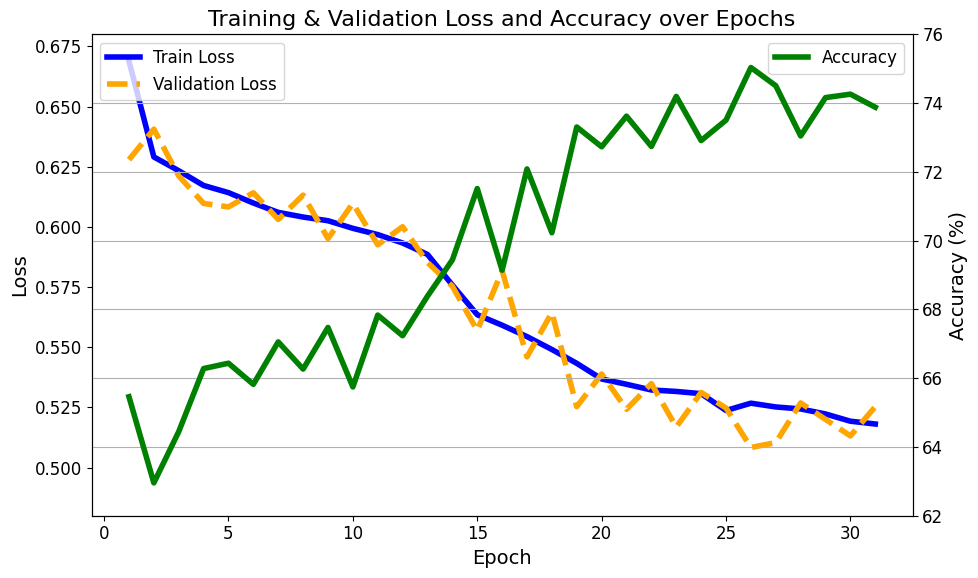

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Load CSV data
data = pd.read_csv('/home/alma1/PointCloud_ML/log_summary/log_summary_z_200_F.csv')
print(data.head())

plt.rcParams.update({
    'font.size': 14,        # General font size
    'axes.titlesize': 16,   # Title font size
    'axes.labelsize': 14,   # Axis label size
    'xtick.labelsize': 12,  # X tick labels
    'ytick.labelsize': 12,  # Y tick labels
    'legend.fontsize': 12   # Legend font size
})
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6), )

# Plot Train and Val Loss on the left y-axis
ax1.plot(data['Epoch'], data['Train Loss'], label='Train Loss', color='blue',linewidth=4)
ax1.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', color='orange',linewidth=4, linestyle='--')
ax1.set_ylabel('Loss')
ax1.set_ylim(0, 1)
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Create secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(data['Epoch'], data['Accuracy'], label='Accuracy', color='green',linewidth=4)
ax2.set_ylabel('Accuracy (%)')
ax2.set_ylim(62, 76)
ax1.set_ylim(0.48, 0.68)
ax2.legend(loc='upper right')

plt.title('Training & Validation Loss and Accuracy over Epochs')
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('./log_summary/plots/Z_200_F_loss_accuracy.pdf', dpi=300, bbox_inches='tight')
plt.savefig('./log_summary/plots/Z_200_F_loss_accuracy.png', dpi=300, bbox_inches='tight')


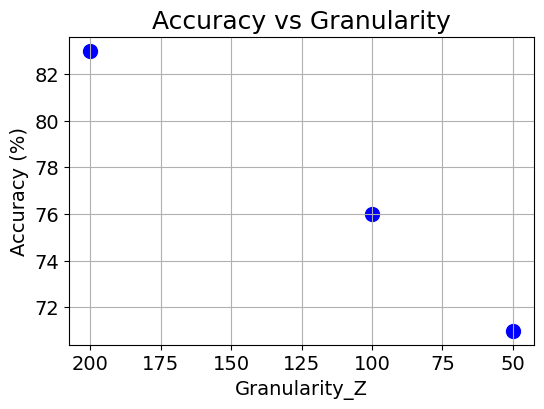

In [37]:
#plot accuracy vs granularity
import matplotlib.pyplot as plt
import numpy as np
accuracy =np.array([83,76,71])
granularity = np.array([200, 100, 50])
plt.rcParams.update({
    'font.size': 16,        # General font size
    'axes.titlesize': 18,   # Title font size
    'axes.labelsize': 14,   # Axis label size
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14   # Legend font size
})
plt.figure(figsize=(6, 4))
plt.gca().invert_xaxis() 
plt.scatter(granularity, accuracy, color='blue', s=100)

plt.title('Accuracy vs Granularity')
plt.xlabel('Granularity_Z')
plt.ylabel('Accuracy (%)')
plt.grid(True)

In [15]:
import re
import pandas as pd

log_file_path = '/home/alma1/PointCloud_ML/log_100.txt'

# Read the log file
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Prepare regex patterns
epoch_pattern = r"Epoch \[(\d+)/\d+\], Train Loss: ([\d.]+), Val Loss: ([\d.]+)"
accuracy_pattern = r"Accuracy: ([\d.]+)%"

# Storage for extracted data
results = []

for i in range(len(lines)):
    epoch_match = re.search(epoch_pattern, lines[i])
    if epoch_match:
        epoch = int(epoch_match.group(1))
        train_loss = float(epoch_match.group(2))
        val_loss = float(epoch_match.group(3))

        # Look ahead for accuracy in the previous few lines
        accuracy = None
        for j in range(i-1, max(i-5, -1), -1):
            acc_match = re.search(accuracy_pattern, lines[j])
            if acc_match:
                accuracy = float(acc_match.group(1))
                break

        results.append({
            "Epoch": epoch,
            "Train Loss": train_loss,
            "Val Loss": val_loss,
            "Accuracy": accuracy
        })

# Save to CSV
df = pd.DataFrame(results)
df.to_csv("log_summary_z_200_F.csv", index=False)
print("Saved to log_summary.csv")


Saved to log_summary.csv


In [20]:
import pickle
import matplotlib.pyplot as plt
pion_dir = "/mnt/d/small_PKL_pion_200/spion1.pkl"
proton_dir = "/mnt/d/small_PKL_proton_200/sproton1.pkl"

proton=pd.read_pickle(proton_dir)
pion=pd.read_pickle(pion_dir)
max_z=proton.loc[proton['z'].idxmax()]

max_z



x                94.000000
y                87.000000
z               157.000000
total_energy      0.001791
mean_time       463.705654
Name: 5518, dtype: float64

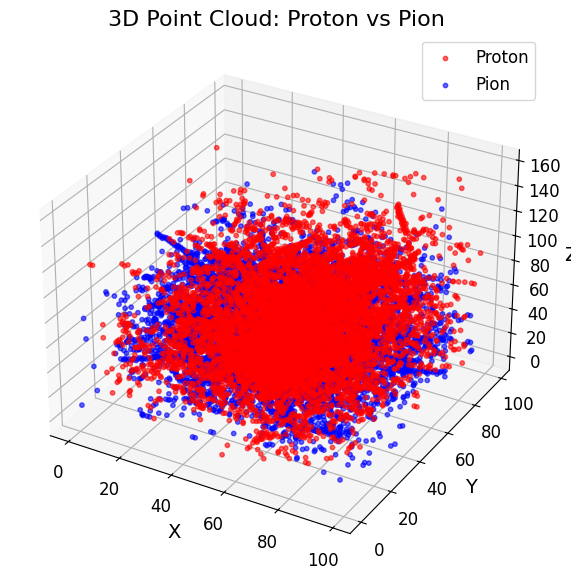

In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Load data
pion_dir = "/mnt/d/small_PKL_pion_200/spion1.pkl"
proton_dir = "/mnt/d/small_PKL_proton_200/sproton1.pkl"

proton = pd.read_pickle(proton_dir)
pion = pd.read_pickle(pion_dir)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot proton points in red
ax.scatter(proton['x'], proton['y'], proton['z'], c='r', label='Proton', s=10, alpha=0.6)

# Plot pion points in blue
ax.scatter(pion['x'], pion['y'], pion['z'], c='b', label='Pion', s=10, alpha=0.6)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud: Proton vs Pion')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Load data
pion_dir = "/mnt/d/small_PKL_pion_200/spion1.pkl"
proton_dir = "/mnt/d/small_PKL_proton_200/sproton1.pkl"

proton = pd.read_pickle(proton_dir)
pion = pd.read_pickle(pion_dir)

# Create traces
proton_trace = go.Scatter3d(
    x=proton['x'],
    y=proton['y'],
    z=proton['z'],
    mode='markers',
    marker=dict(
        size=3,
        color='red',
        opacity=0.7
    ),
    name='Proton'
)

pion_trace = go.Scatter3d(
    x=pion['x'],
    y=pion['y'],
    z=pion['z'],
    mode='markers',
    marker=dict(
        size=3,
        color='blue',
        opacity=0.7
    ),
    name='Pion'
)

# Layout with larger title and tick label fonts
layout = go.Layout(
    title='3D Point Cloud: Proton vs Pion',
    scene=dict(
        xaxis=dict(
            title='X',
            titlefont=dict(size=20),
            tickfont=dict(size=16)
        ),
        yaxis=dict(
            title='Y',
            titlefont=dict(size=20),
            tickfont=dict(size=16)
        ),
        zaxis=dict(
            title='Z',
            titlefont=dict(size=20),
            tickfont=dict(size=16)
        ),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(
        x=0.8,
        y=0.9,
        font=dict(size=18)
    ),
    titlefont=dict(size=20)
)

# Combine and plot
fig = go.Figure(data=[proton_trace, pion_trace], layout=layout)

# Save to HTML
pyo.plot(fig, filename='proton_pion_point_cloud.html')


'proton_pion_point_cloud.html'

MESA: error: ZINK: failed to choose pdev
libEGL warning: egl: failed to create dri2 screen
